# Week 1: Mean/Covariance of a data set and effect of a linear transformation

In this week, we are going to investigate how the mean and (co)variance of a dataset changes
when we apply affine transformation to the dataset.

## Learning objectives
1. Get Farmiliar with basic programming using Python and Numpy/Scipy.
2. Learn to appreciate implementing
   functions to compute statistics of dataset in vectorized way.
3. Understand the effects of affine transformations on a dataset.
4. Understand the importance of testing in programming for machine learning.

First, let's import the packages that we will use for the week

In [1]:
# PACKAGE: DO NOT EDIT
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
from sklearn.datasets import fetch_olivetti_faces
import time
import timeit
%matplotlib inline

Next, we are going to retrieve Olivetti faces dataset.

When working with some datasets, before digging into further analysis, it is almost always
useful to do a few things to understand your dataset. First of all, answer the following
set of questions:

1. What is the size of your dataset?
2. What is the dimensionality of your data?

The dataset we have are usually stored as 2D matrices, then it would be really important
to know which dimension represents the dimension of the dataset, and which represents
the data points in the dataset. 

__When you implement the functions for your assignment, make sure you read
the docstring for what each dimension of your inputs represents the data points, and which 
represents the dimensions of the dataset!__

In [2]:
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces(data_home='./')
faces = dataset.data

print('Shape of the faces dataset: {}'.format(faces.shape))
print('{} data points'.format(faces.shape[0]))

Shape of the faces dataset: (400, 4096)
400 data points


When your dataset are images, it's a really good idea to see what they look like.

One very
convenient tool in Jupyter is the `interact` widget, which we use to visualize the images (faces). For more information on how to use interact, have a look at the documentation [here](http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html).

In [3]:
from ipywidgets import interact

In [4]:
def show_face(face):
    plt.figure()
    plt.imshow(face.reshape((64, 64)), cmap='gray')
    plt.show()
#for i in faces:
#    show_face(i)

In [5]:
@interact(n=(0, len(faces)-1))
def display_faces(n=0):
    plt.figure()
    plt.imshow(faces[n].reshape((64, 64)), cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=0, description='n', max=399), Output()), _dom_classes=('widget-interact'…

## 1. Mean and Covariance of a Dataset

#### show how algorithms are working in step-by-step manner

# Mean

In [6]:
# example for testing function
X = np.array([[0., 1., 1.], 
              [1., 2., 1.]])
print(np.mean(X, axis=0)) # column average
print(np.mean(X, axis=1)) # row average

[0.5 1.5 1. ]
[0.66666667 1.33333333]


In [7]:
def mean_naive(X):
    # mean = average (X[1, :])
    N, D = X.shape
    mean = np.zeros(D)
    
    for n in range(N):
        for i in range(D):
            mean[i] = mean[i] + X[n, i]
            print(f"mean[{i}] = mean[{i}] + X[{n, i}]")
    print()
    print(f"array[mean[1], mean[2], mean[3]]")
    mean /= N
    
    return mean

In [8]:
print(np.mean(X, axis=0)) # the vector that we want to get
mean_naive(X)

[0.5 1.5 1. ]
mean[0] = mean[0] + X[(0, 0)]
mean[1] = mean[1] + X[(0, 1)]
mean[2] = mean[2] + X[(0, 2)]
mean[0] = mean[0] + X[(1, 0)]
mean[1] = mean[1] + X[(1, 1)]
mean[2] = mean[2] + X[(1, 2)]

array[mean[1], mean[2], mean[3]]


array([0.5, 1.5, 1. ])

# Covariance

In [9]:
np.cov(X.T) # the vector we want to get

array([[0.5, 0.5, 0. ],
       [0.5, 0.5, 0. ],
       [0. , 0. , 0. ]])

In [13]:
print(X)
print()
print(X[0, :])

[[0. 1. 1.]
 [1. 2. 1.]]

[0. 1. 1.]


In [34]:
def cov_naive(X): 
    # var[D] = 1/N sum {(x - mu) @ (x - mu).T}
    N, D = X.shape
    covariance = np.zeros((D, D)) 
    
    mat = np.zeros((N, D))
    mean = mean_naive(X)
    print()

    for i in range(N):
        mat[i] = X[i,:] - mean
        print(mat[i], X[i,:], mean)
    print()
    print(mat[:, 2])
    print()
    
    for i in range(D):
        for j in range(D):
            covariance[i, j] = covariance[i, j] + mat[:,i]@mat[:,j] # mat[:, i] @ mat[:, j] is used as mat @ mat.T
            print(f"covariance[{i}, {j}] = covariance[{i}, {j}] + mat[:, {i}] @ mat[:, {j}]")
            
    return covariance/N
print(cov_naive(X))

def cov(X):
    covariance_matrix = np.cov(X, rowvar=False, bias=True) # rowvar: (false: transpose) bias: (false = sample cov, true = pop. cov)
    return covariance_matrix
print(cov(X))

mean[0] = mean[0] + X[(0, 0)]
mean[1] = mean[1] + X[(0, 1)]
mean[2] = mean[2] + X[(0, 2)]
mean[0] = mean[0] + X[(1, 0)]
mean[1] = mean[1] + X[(1, 1)]
mean[2] = mean[2] + X[(1, 2)]

array[mean[1], mean[2], mean[3]]

[-0.5 -0.5  0. ] [0. 1. 1.] [0.5 1.5 1. ]
[0.5 0.5 0. ] [1. 2. 1.] [0.5 1.5 1. ]

[0. 0.]

covariance[0, 0] = covariance[0, 0] + mat[:, 0] @ mat[:, 0]
covariance[0, 1] = covariance[0, 1] + mat[:, 0] @ mat[:, 1]
covariance[0, 2] = covariance[0, 2] + mat[:, 0] @ mat[:, 2]
covariance[1, 0] = covariance[1, 0] + mat[:, 1] @ mat[:, 0]
covariance[1, 1] = covariance[1, 1] + mat[:, 1] @ mat[:, 1]
covariance[1, 2] = covariance[1, 2] + mat[:, 1] @ mat[:, 2]
covariance[2, 0] = covariance[2, 0] + mat[:, 2] @ mat[:, 0]
covariance[2, 1] = covariance[2, 1] + mat[:, 2] @ mat[:, 1]
covariance[2, 2] = covariance[2, 2] + mat[:, 2] @ mat[:, 2]
[[0.25 0.25 0.  ]
 [0.25 0.25 0.  ]
 [0.   0.   0.  ]]
[[0.25 0.25 0.  ]
 [0.25 0.25 0.  ]
 [0.   0.   0.  ]]


In [47]:
def cov_naive(X):
    N, D = X.shape
    covariance = np.zeros((D, D))
    
    mean = np.mean(X, axis=0)                 # = mean_navie(X)
    X -= mean                                 # (x - mu)
    covariance = np.dot(X.T, X) / N    # (X.T @ X.conj) / N
    return covariance
print(cov_naive(X))

def cov(X):
    N, D = X.shape
    covariance_matrix = np.cov(X.T, bias=True)
    return covariance_matrix
print(cov(X))

[[0.25 0.25 0.  ]
 [0.25 0.25 0.  ]
 [0.   0.   0.  ]]
[[0.25 0.25 0.  ]
 [0.25 0.25 0.  ]
 [0.   0.   0.  ]]


# to submit the project

In [43]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def mean_naive(X):
    """Compute the sample mean for a dataset by iterating over the dataset.
    
    Args:
        X: `ndarray` of shape (N, D) representing the dataset. N 
        is the size of the dataset and D is the dimensionality of the dataset.
    Returns:
        mean: `ndarray` of shape (D, ), the sample mean of the dataset `X`.
    """
    # YOUR CODE HERE
    ### Uncomment and edit the code below
    #iterate over the dataset and compute the mean vector.
    N, D = X.shape
    mean = np.zeros((D,))
    for n in range(N):
        for i in range(D):
            mean[i] = mean[i] + X[n, i]
            print(f"mean[{i}] = mean[{i}] + X[{n, i}]")
    mean /= N
    return mean

def cov_naive(X):
    """Compute the sample covariance for a dataset by iterating over the dataset.
    
    Args:
        X: `ndarray` of shape (N, D) representing the dataset. N 
        is the size of the dataset and D is the dimensionality of the dataset.
    Returns:
        ndarray: ndarray with shape (D, D), the sample covariance of the dataset `X`.
    """
    # YOUR CODE HERE
    ### Uncomment and edit the code below
    N, D = X.shape
    ### Edit the code below to compute the covariance matrix by iterating over the dataset.
    covariance = np.zeros((D, D))
    ### Update covariance
    mean = np.mean(X, axis=0)
    X -= mean
    covariance = np.dot(X.T, X.conj()) / N
    ###
    return covariance

def mean(X):
    """Compute the sample mean for a dataset.
    
    Args:
        X: `ndarray` of shape (N, D) representing the dataset. N 
        is the size of the dataset and D is the dimensionality of the dataset.
    Returns:
        ndarray: ndarray with shape (D,), the sample mean of the dataset `X`.
    """
    # YOUR CODE HERE
    ## Uncomment and edit the code below
    m = np.mean(X, axis=0)
    return m

def cov(X):
    """Compute the sample covariance for a dataset.
    
    Args:
        X: `ndarray` of shape (N, D) representing the dataset. N 
        is the size of the dataset and D is the dimensionality of the dataset.
    Returns:
        ndarray: ndarray with shape (D, D), the sample covariance of the dataset `X`.
    """
    # YOUR CODE HERE
    
    # It is possible to vectorize our code for computing the covariance with matrix multiplications,
    # i.e., we do not need to explicitly
    # iterate over the entire dataset as looping in Python tends to be slow
    # We challenge you to give a vectorized implementation without using np.cov, but if you choose to use np.cov,
    # be sure to pass in bias=True.
    ### Uncomment and edit the code below
    N, D = X.shape
    ### Edit the code to compute the covariance matrix
    covariance_matrix = np.cov(X.T, bias=True)
    ### Update covariance_matrix here
  
    ###
    return covariance_matrix

In [44]:
from numpy.testing import assert_allclose

# Test case 1
X = np.array([[0., 1., 1.], 
              [1., 2., 1.]])
expected_mean = np.array([0.5, 1.5, 1.])
assert_allclose(mean(X), expected_mean, rtol=1e-5)

# Test case 2
X = np.array([[0., 1., 0.], 
              [2., 3., 1.]])
expected_mean = np.array([1., 2., 0.5])
assert_allclose(mean(X), expected_mean, rtol=1e-5)

# Test covariance is zero
X = np.array([[0., 1.], 
              [0., 1.]])
expected_mean = np.array([0., 1.])
assert_allclose(mean(X), expected_mean, rtol=1e-5)

### Some hidden tests below
### ...

In [45]:
cov(np.array([[0., 1.], 
     [1., 2.],
     [0., 1.], 
     [1., 2.]
    ]))

array([[0.25, 0.25],
       [0.25, 0.25]])

In [46]:
from numpy.testing import assert_allclose

# Test case 1
X = np.array([[0., 1.], 
              [1., 2.],
     [0., 1.], 
     [1., 2.]])
expected_cov = np.array(
    [[0.25, 0.25],
    [0.25, 0.25]])

assert_allclose(cov(X), expected_cov, rtol=1e-5)

# Test case 2
X = np.array([[0., 1.], 
              [2., 3.]])
expected_cov = np.array(
    [[1., 1.],
    [1., 1.]])

assert_allclose(cov(X), expected_cov, rtol=1e-5)

# Test covariance is zero
X = np.array([[0., 1.], 
              [0., 1.],
              [0., 1.]])
expected_cov = np.zeros((2, 2))

assert_allclose(cov(X), expected_cov, rtol=1e-5)

### Some hidden tests below
### ...

With the `mean` function implemented, let's take a look at the _mean_ face of our dataset!

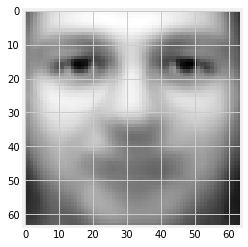

In [47]:
def mean_face(faces):
    return faces.mean(axis=0).reshape((64, 64))

plt.imshow(mean_face(faces), cmap='gray');

One of the advantage of writing vectorized code is speedup gained when working on larger dataset. Loops in Python
are slow, and most of the time you want to utilise the fast native code provided by Numpy without explicitly using
for loops. To put things into perspective, we can benchmark the two different implementation with the `%time` function
in the following way:

In [48]:
# We have some HUUUGE data matrix which we want to compute its mean
X = np.random.randn(1000, 20)
# Benchmarking time for computing mean
%time mean_naive(X)
%time mean(X)
pass

mean[0] = mean[0] + X[(0, 0)]
mean[1] = mean[1] + X[(0, 1)]
mean[2] = mean[2] + X[(0, 2)]
mean[3] = mean[3] + X[(0, 3)]
mean[4] = mean[4] + X[(0, 4)]
mean[5] = mean[5] + X[(0, 5)]
mean[6] = mean[6] + X[(0, 6)]
mean[7] = mean[7] + X[(0, 7)]
mean[8] = mean[8] + X[(0, 8)]
mean[9] = mean[9] + X[(0, 9)]
mean[10] = mean[10] + X[(0, 10)]
mean[11] = mean[11] + X[(0, 11)]
mean[12] = mean[12] + X[(0, 12)]
mean[13] = mean[13] + X[(0, 13)]
mean[14] = mean[14] + X[(0, 14)]
mean[15] = mean[15] + X[(0, 15)]
mean[16] = mean[16] + X[(0, 16)]
mean[17] = mean[17] + X[(0, 17)]
mean[18] = mean[18] + X[(0, 18)]
mean[19] = mean[19] + X[(0, 19)]
mean[0] = mean[0] + X[(1, 0)]
mean[1] = mean[1] + X[(1, 1)]
mean[2] = mean[2] + X[(1, 2)]
mean[3] = mean[3] + X[(1, 3)]
mean[4] = mean[4] + X[(1, 4)]
mean[5] = mean[5] + X[(1, 5)]
mean[6] = mean[6] + X[(1, 6)]
mean[7] = mean[7] + X[(1, 7)]
mean[8] = mean[8] + X[(1, 8)]
mean[9] = mean[9] + X[(1, 9)]
mean[10] = mean[10] + X[(1, 10)]
mean[11] = mean[11] + X[(1, 11)]
mean

In [49]:
# Benchmarking time for computing covariance
%time cov_naive(X)
%time cov(X)
pass

CPU times: user 497 µs, sys: 171 µs, total: 668 µs
Wall time: 388 µs
CPU times: user 919 µs, sys: 0 ns, total: 919 µs
Wall time: 526 µs


## 2. Affine Transformation of Dataset
In this week we are also going to verify a few properties about the mean and
covariance of affine transformation of random variables.

Consider a data matrix $X$ of size (N, D). We would like to know
what is the covariance when we apply affine transformation $Ax_i + b$ for each datapoint $x_i$ in $X$. i.e.
we would like to know what happens to the mean and covariance for the new dataset if we apply affine transformation.

In [50]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

def affine_mean(mean, A, b):
    """Compute the mean after affine transformation
    Args:
        mean: `ndarray` of shape (D,), the sample mean vector for some dataset.
        A, b: `ndarray` of shape (D, D) and (D,), affine transformation applied to x
    Returns:
        sample mean vector of shape (D,) after affine transformation.
    """
    # YOUR CODE HERE
    ### Uncomment and edit the code below
    ### Edit the code below to compute the mean vector after affine transformation
    affine_m = A @ mean + b
    ### Update affine_m
  
    ###
    return affine_m

In [51]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def affine_covariance(S, A, b):
    """Compute the covariance matrix after affine transformation
    
    Args:
        mean: `ndarray` of shape (D,), the sample covariance matrix for some dataset.
        A, b: `ndarray` of shape (D, D) and (D,), affine transformation applied to x
    
    Returns:
        sample covariance matrix of shape (D, D) after the transformation
    """
    # YOUR CODE HERE
    ### Uncomment and edit the code below
    ### EDIT the code below to compute the covariance matrix after affine transformation
    affine_cov = A @ S @ A.T
    ### Update affine_cov
  
    ###
    return affine_cov

In [52]:
from numpy.testing import assert_allclose

A = np.array([[0, 1], [2, 3]])
b = np.ones(2)
m = np.full((2,), 2)
S = np.eye(2)*2

expected_affine_mean = np.array([ 3., 11.])
expected_affine_cov = np.array(
    [[ 2.,  6.],
    [ 6., 26.]])

assert_allclose(affine_mean(m, A, b), expected_affine_mean, rtol=1e-4)
### Some hidden tests below
### ...

In [53]:
from numpy.testing import assert_allclose

A = np.array([[0, 1], [2, 3]])
b = np.ones(2)
m = np.full((2,), 2)
S = np.eye(2)*2

expected_affine_cov = np.array(
    [[ 2.,  6.],
    [ 6., 26.]])

assert_allclose(affine_covariance(S, A, b), 
                expected_affine_cov, rtol=1e-4)

### Some hidden tests below
### ...

Once the two functions above are implemented, we can verify the correctness our implementation. Assuming that we have some $A$ and $b$.

In [54]:
random = np.random.RandomState(42)
A = random.randn(4,4)
b = random.randn(4)

print(A)
print(b)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]
[-1.01283112  0.31424733 -0.90802408 -1.4123037 ]


Next we can generate some random dataset $X$

In [55]:
X = random.randn(100, 4)

Assuming that for some dataset $X$, the mean and covariance are $m$, $S$, and for the new dataset after affine transformation $X'$, the mean and covariance are $m'$ and $S'$, then we would have the following identity:

$$m' = \text{affine_mean}(m, A, b)$$

$$S' = \text{affine_covariance}(S, A, b)$$

In [56]:
X1 = ((A @ (X.T)).T + b)  # applying affine transformation once
X2 = ((A @ (X1.T)).T + b) # twice

One very useful way to compare whether arrays are equal/similar is use the helper functions
in `numpy.testing`.

Check the Numpy [documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.testing.html)
for details.

If you are interested in learning more about floating point arithmetic, here is a good [paper](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.22.6768).

In [62]:
print(np.testing.assert_allclose(mean(X1), affine_mean(mean(X), A, b)) == np.testing.assert_allclose(cov(X1),  affine_covariance(cov(X), A, b)))

True


In [57]:
np.testing.assert_allclose(mean(X1), affine_mean(mean(X), A, b))
np.testing.assert_allclose(cov(X1),  affine_covariance(cov(X), A, b))

In [58]:
np.testing.assert_allclose(mean(X2), affine_mean(mean(X1), A, b))
np.testing.assert_allclose(cov(X2),  affine_covariance(cov(X1), A, b))